In [1]:
# Import library
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv
df = pd.read_csv('../Dataset/Fake News Prediction Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
df.duplicated().sum()

0

# EDA

1. Label Distribution

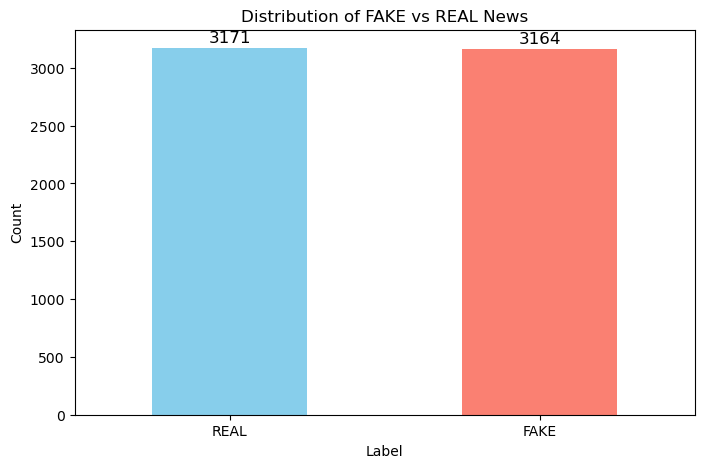

In [5]:
# Plotting the distribution of 'label' column
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
colors = ['skyblue', 'salmon']
label_counts.plot(kind='bar', color=colors)
plt.title('Distribution of FAKE vs REAL News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding the count annotations on top of each bar
for index, value in enumerate(label_counts):
    plt.text(index, value + 50, f'{value}', ha='center', fontsize=12)

plt.show()

2. Text Length Distribution

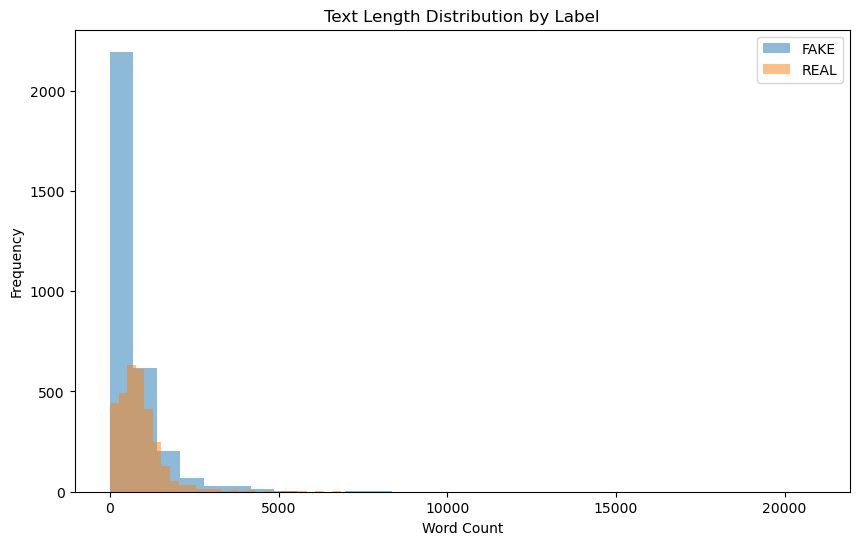

In [6]:
# Calculate the number of words in each article and plot distributions by label
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
df[df['label'] == 'FAKE']['text_word_count'].plot(kind='hist', alpha=0.5, label='FAKE', bins=30)
df[df['label'] == 'REAL']['text_word_count'].plot(kind='hist', alpha=0.5, label='REAL', bins=30)
plt.title('Text Length Distribution by Label')
plt.xlabel('Word Count')
plt.legend()
plt.show()


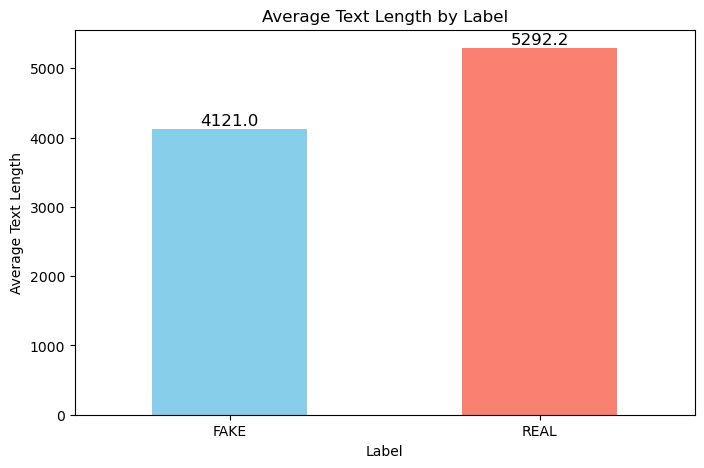

label
FAKE    4121.046460
REAL    5292.160202
Name: text_length, dtype: float64

In [7]:
# Calculate the length of each article's text and add it as a new column
df['text_length'] = df['text'].apply(len)

# Calculate average text length by label
average_text_length_by_label = df.groupby('label')['text_length'].mean()

# Plot the average text length by label
plt.figure(figsize=(8, 5))
average_text_length_by_label.plot(kind='bar', color=colors)
plt.title('Average Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)

# Adding the average values on top of each bar
for index, value in enumerate(average_text_length_by_label):
    plt.text(index, value + 50, f'{value:.1f}', ha='center', fontsize=12)

plt.show()

average_text_length_by_label


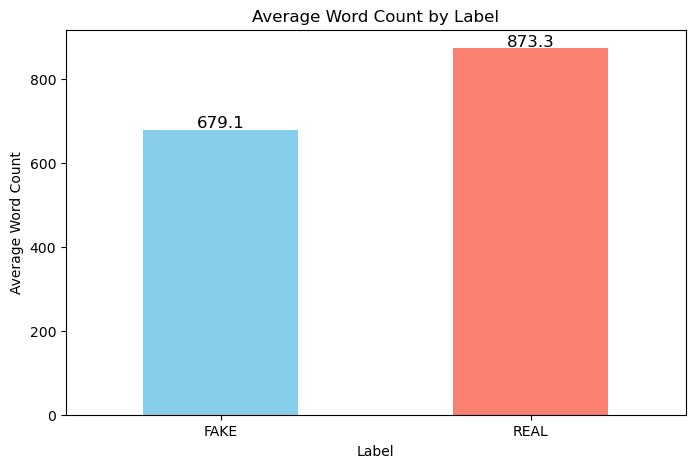

label
FAKE    679.129267
REAL    873.257647
Name: word_count, dtype: float64

In [8]:
# Calculate the word count of each article's text and add it as a new column
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Calculate average word count by label
average_word_count_by_label = df.groupby('label')['word_count'].mean()

# Plot the average word count by label
plt.figure(figsize=(8, 5))
average_word_count_by_label.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Word Count by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)

# Adding the average values on top of each bar
for index, value in enumerate(average_word_count_by_label):
    plt.text(index, value + 5, f'{value:.1f}', ha='center', fontsize=12)

plt.show()

average_word_count_by_label

3. Word Cloud of Common Words

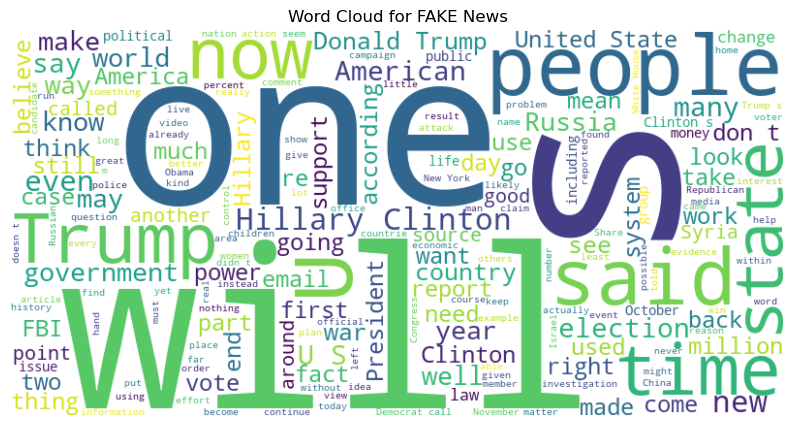

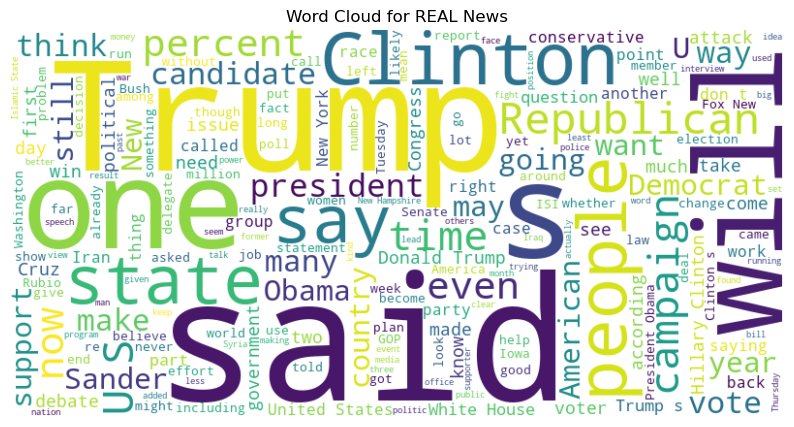

In [9]:
from wordcloud import WordCloud

# Word Cloud for FAKE news
fake_text = " ".join(df[df['label'] == 'FAKE']['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for FAKE News')
plt.show()

# Word Cloud for REAL news
real_text = " ".join(df[df['label'] == 'REAL']['text'])
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for REAL News')
plt.show()


4. Bigram and Trigram Analysis in Titles

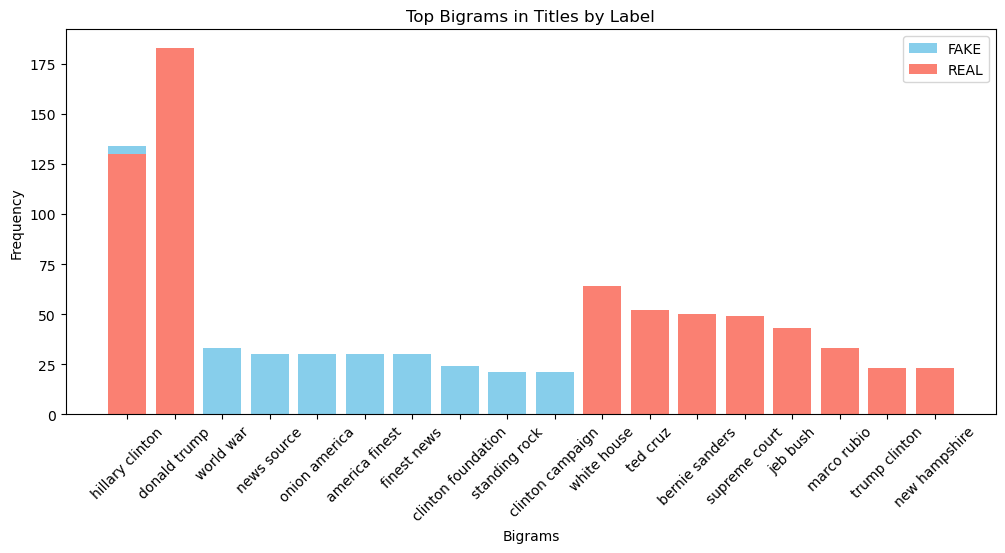

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams for FAKE news titles
fake_titles = df[df['label'] == 'FAKE']['title']
fake_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(fake_titles)
fake_bigrams = fake_vectorizer.transform(fake_titles)
fake_bigram_counts = pd.DataFrame(fake_bigrams.toarray(), columns=fake_vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# Bigrams for REAL news titles
real_titles = df[df['label'] == 'REAL']['title']
real_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(real_titles)
real_bigrams = real_vectorizer.transform(real_titles)
real_bigram_counts = pd.DataFrame(real_bigrams.toarray(), columns=real_vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 5))
plt.bar(fake_bigram_counts.index, fake_bigram_counts.values, color='skyblue', label='FAKE')
plt.bar(real_bigram_counts.index, real_bigram_counts.values, color='salmon', label='REAL')
plt.xticks(rotation=45)
plt.title('Top Bigrams in Titles by Label')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5. Linguistic Structure Analysis (POS Tagging)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


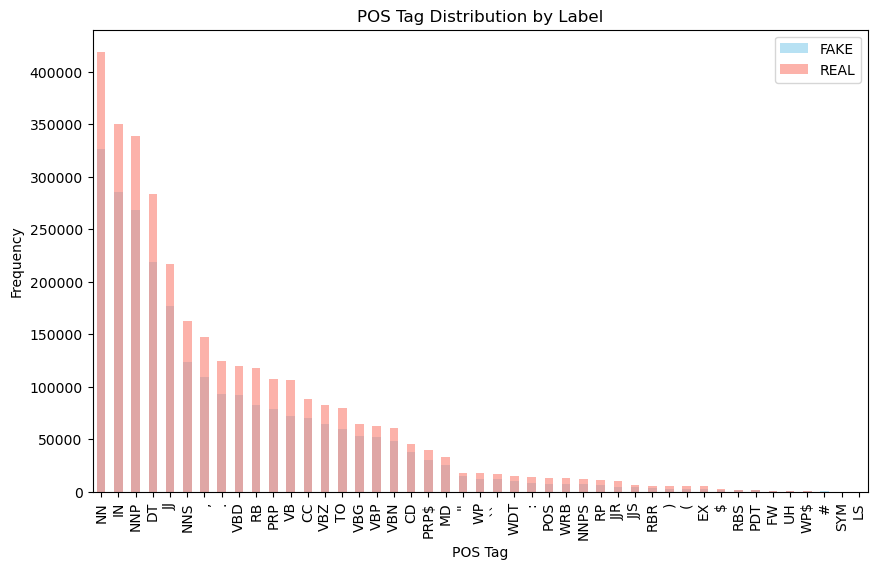

In [11]:
import nltk
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# POS tagging for FAKE and REAL articles
fake_pos_tags = pos_tag(word_tokenize(" ".join(df[df['label'] == 'FAKE']['text'])))
real_pos_tags = pos_tag(word_tokenize(" ".join(df[df['label'] == 'REAL']['text'])))

# Count POS tag frequencies
fake_pos_counts = pd.DataFrame(fake_pos_tags, columns=['Word', 'POS']).POS.value_counts()
real_pos_counts = pd.DataFrame(real_pos_tags, columns=['Word', 'POS']).POS.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
fake_pos_counts.plot(kind='bar', color='skyblue', alpha=0.6, label='FAKE')
real_pos_counts.plot(kind='bar', color='salmon', alpha=0.6, label='REAL')
plt.title('POS Tag Distribution by Label')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.legend()
plt.show()


6. Sentiment Analysis

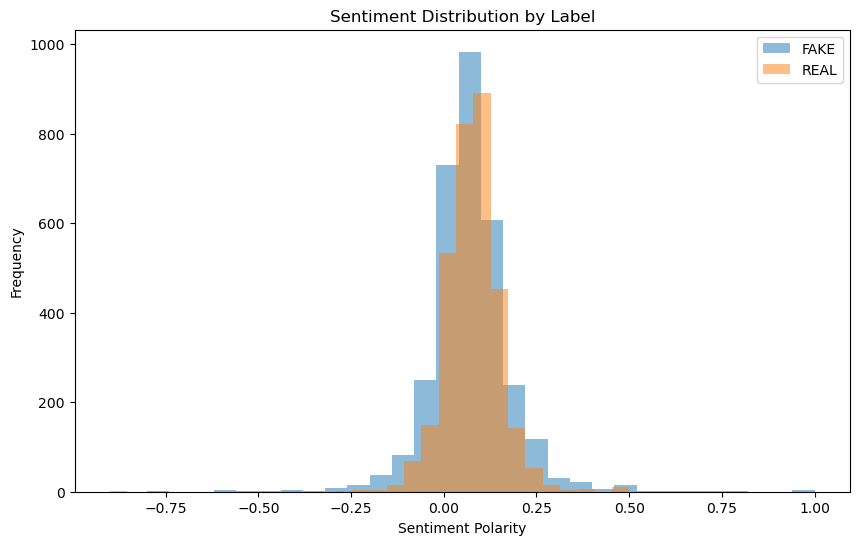

In [12]:
from textblob import TextBlob

# Adding a sentiment score column
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting sentiment distributions by label
plt.figure(figsize=(10, 6))
df[df['label'] == 'FAKE']['sentiment'].plot(kind='hist', alpha=0.5, label='FAKE', bins=30)
df[df['label'] == 'REAL']['sentiment'].plot(kind='hist', alpha=0.5, label='REAL', bins=30)
plt.title('Sentiment Distribution by Label')
plt.xlabel('Sentiment Polarity')
plt.legend()
plt.show()


7. Topic Modeling (LDA)

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# LDA for FAKE articles
fake_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
fake_text_vectorized = fake_vectorizer.fit_transform(df[df['label'] == 'FAKE']['text'])
fake_lda = LatentDirichletAllocation(n_components=5, random_state=42)
fake_topics = fake_lda.fit_transform(fake_text_vectorized)

# Displaying the top words for each topic
for idx, topic in enumerate(fake_lda.components_):
    print(f"Top 10 words for topic #{idx}")
    print([fake_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top 10 words for topic #0
['new', 'american', 'money', 'federal', 'law', 'said', 'state', 'police', 'people', 'government']


Top 10 words for topic #1
['like', 'obama', 'just', 'president', 'people', 'donald', 'hillary', 'clinton', 'election', 'trump']


Top 10 words for topic #2
['said', 'government', 'united', 'states', 'world', 'syria', 'military', 'russian', 'war', 'russia']


Top 10 words for topic #3
['health', 'new', 'years', 'com', 'life', 'time', 'just', 'like', 'world', 'people']


Top 10 words for topic #4
['election', 'wikileaks', 'comey', 'email', 'campaign', 'investigation', 'emails', 'fbi', 'hillary', 'clinton']




8. Clickbait Patterns in Titles

In [14]:
# Checking for clickbait words and exclamation points in titles
df['exclamation_count'] = df['title'].apply(lambda x: x.count('!'))
df['clickbait_words'] = df['title'].apply(lambda x: any(word in x.lower() for word in ['shocking', 'you won\'t believe', 'amazing', 'incredible']))

# Average count of exclamations and presence of clickbait words by label
clickbait_stats = df.groupby('label')[['exclamation_count', 'clickbait_words']].mean()

print(clickbait_stats)


       exclamation_count  clickbait_words
label                                    
FAKE            0.060683         0.007269
REAL            0.002838         0.002208


In [15]:
from collections import Counter
import re

# Function to preprocess text by removing non-alphanumeric characters and splitting into words
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return text.split()

# Separate texts by label
fake_text = " ".join(df[df['label'] == 'FAKE']['text'].apply(lambda x: " ".join(preprocess_text(x))))
real_text = " ".join(df[df['label'] == 'REAL']['text'].apply(lambda x: " ".join(preprocess_text(x))))

# Count most common words in each category
fake_word_counts = Counter(fake_text.split()).most_common(10)
real_word_counts = Counter(real_text.split()).most_common(10)

# Convert to DataFrame for display
fake_word_df = pd.DataFrame(fake_word_counts, columns=['Word', 'Frequency'])
real_word_df = pd.DataFrame(real_word_counts, columns=['Word', 'Frequency'])

# Display both DataFrames
fake_word_df, real_word_df


(   Word  Frequency
 0   the     129572
 1    of      61012
 2    to      60137
 3   and      55139
 4     a      42962
 5    in      40577
 6  that      30424
 7    is      27172
 8     s      22189
 9   for      19615,
    Word  Frequency
 0   the     161460
 1    to      79744
 2    of      68847
 3     a      65770
 4   and      65003
 5    in      58160
 6  that      42171
 7     s      39925
 8    is      27263
 9   for      26863)

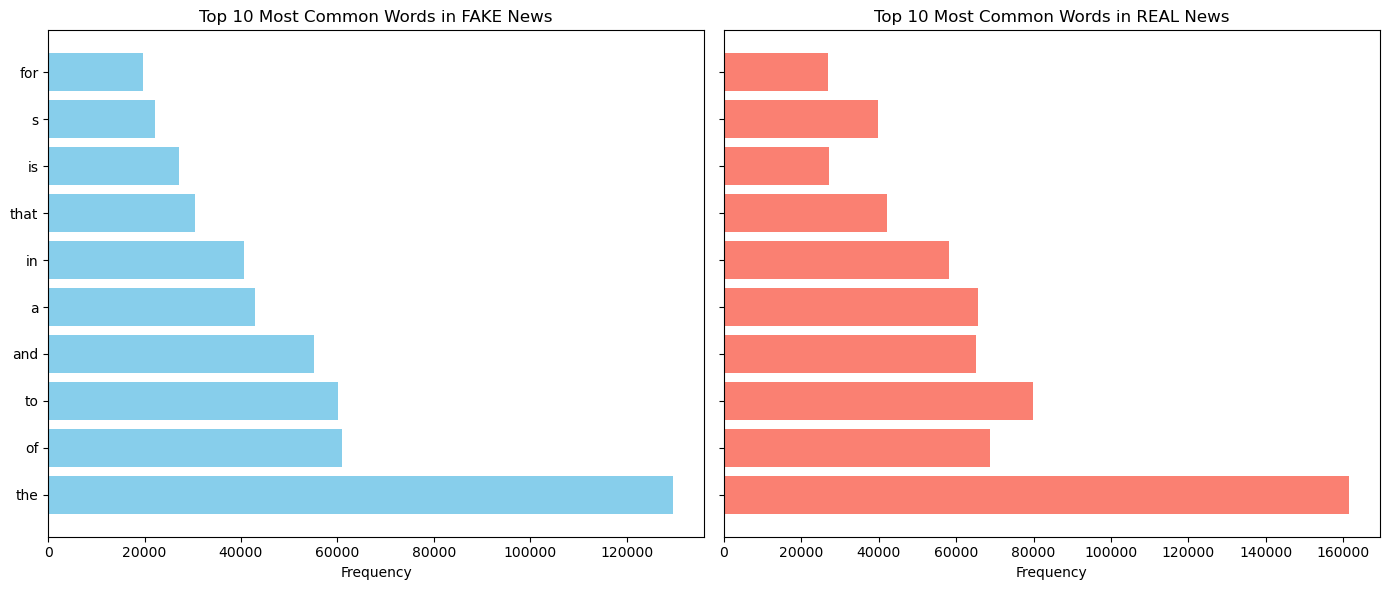

In [16]:
# Visualizing word frequency distributions for the top 10 words in FAKE and REAL news

# Separate plots for FAKE and REAL news word frequency
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for FAKE news
ax[0].barh(fake_word_df['Word'], fake_word_df['Frequency'], color='skyblue')
ax[0].set_title('Top 10 Most Common Words in FAKE News')
ax[0].set_xlabel('Frequency')
ax[0].invert_yaxis()  # Highest frequency on top

# Plot for REAL news
ax[1].barh(real_word_df['Word'], real_word_df['Frequency'], color='salmon')
ax[1].set_title('Top 10 Most Common Words in REAL News')
ax[1].set_xlabel('Frequency')
ax[1].invert_yaxis()  # Highest frequency on top

plt.tight_layout()
plt.show()


In [17]:
# Find unique words by label by converting each text to a set of unique words, then flatten and count
fake_unique_words = set(" ".join(df[df['label'] == 'FAKE']['text'].apply(lambda x: " ".join(preprocess_text(x)))).split())
real_unique_words = set(" ".join(df[df['label'] == 'REAL']['text'].apply(lambda x: " ".join(preprocess_text(x)))).split())

# Find words unique to each label by taking set differences
unique_to_fake = fake_unique_words - real_unique_words
unique_to_real = real_unique_words - fake_unique_words

# Count of unique words in each set
unique_counts = {
    'Unique to FAKE': len(unique_to_fake),
    'Unique to REAL': len(unique_to_real),
    'Total Unique Words in FAKE': len(fake_unique_words),
    'Total Unique Words in REAL': len(real_unique_words)
}

unique_counts


{'Unique to FAKE': 24012,
 'Unique to REAL': 14290,
 'Total Unique Words in FAKE': 53429,
 'Total Unique Words in REAL': 43707}

In [18]:
# Analyzing the titles by calculating word counts and examining the most common words
# Adding a column with title word counts
df['title_word_count'] = df['title'].apply(lambda x: len(preprocess_text(x)))

# Calculate average and median word count in titles by label
title_word_count_stats = df.groupby('label')['title_word_count'].agg(['mean', 'median'])

# Get most common words in titles for each label
fake_title_text = " ".join(df[df['label'] == 'FAKE']['title'].apply(lambda x: " ".join(preprocess_text(x))))
real_title_text = " ".join(df[df['label'] == 'REAL']['title'].apply(lambda x: " ".join(preprocess_text(x))))

# Count most common words in titles for each category
fake_title_word_counts = Counter(fake_title_text.split()).most_common(10)
real_title_word_counts = Counter(real_title_text.split()).most_common(10)

# Convert to DataFrame for clearer display
fake_title_word_df = pd.DataFrame(fake_title_word_counts, columns=['Word', 'Frequency'])
real_title_word_df = pd.DataFrame(real_title_word_counts, columns=['Word', 'Frequency'])

# Display the title statistics and most common words in titles
title_word_count_stats, fake_title_word_df, real_title_word_df


(            mean  median
 label                   
 FAKE   11.371681    11.0
 REAL   10.259540    10.0,
       Word  Frequency
 0      the       1157
 1       to        908
 2       of        644
 3        s        615
 4       in        575
 5    trump        463
 6      for        419
 7       on        410
 8  hillary        404
 9      and        375,
       Word  Frequency
 0      the        964
 1        s        816
 2       to        813
 3    trump        652
 4       in        597
 5       of        447
 6  clinton        401
 7      for        383
 8        a        376
 9       on        358)

# Data Preprocessing

In [19]:
import re

# Function to clean text
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    return text.lower()

# Apply the function to both text and title columns
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_title'] = df['title'].apply(clean_text)


In [20]:
# Tokenize the cleaned text and title
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: x.split())
df['tokenized_title'] = df['cleaned_title'].apply(lambda x: x.split())


In [21]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopwords removal to tokenized text and title
df['text_no_stopwords'] = df['tokenized_text'].apply(remove_stopwords)
df['title_no_stopwords'] = df['tokenized_title'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
df['lemmatized_text'] = df['text_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['lemmatized_title'] = df['title_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
# Join lemmatized tokens back to a single string for each article
df['final_cleaned_text'] = df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))
df['final_cleaned_title'] = df['lemmatized_title'].apply(lambda tokens: ' '.join(tokens))

# Display the first few rows to check the final processed text
df[['final_cleaned_text', 'final_cleaned_title']].head()


,final_cleaned_text,final_cleaned_title
0,daniel greenfield shillman journalism fellow f...,smell hillary fear
1,google pinterest digg linkedin reddit stumbleu...,watch exact moment paul ryan committed politic...
2,u secretary state john f kerry said monday sto...,kerry go paris gesture sympathy
3,kaydee king kaydeeking november lesson tonight...,bernie supporter twitter erupt anger dnc tried...
4,primary day new york front runner hillary clin...,battle new york primary matter


# Feature Engineering

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

# Transform the cleaned text to Bag of Words features
X_bow = vectorizer.fit_transform(df['final_cleaned_text'])

# Convert to DataFrame for a clearer view of the features
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()


,ability,able,abortion,access,according,account,accused,act,action,activist,activity,actually,ad,add,added,adding,address,administration,adviser,affair,african,age,agency,agenda,agent,ago,agree,agreement,ahead,aide,air,al,allow,allowed,ally,alternative,amendment,america,american,analysis,announced,answer,anti,appeal,appear,appeared,appears,approach,april,arab,arabia,area,argument,arm,armed,army,article,ask,asked,assad,assault,associated,attack,attempt,attention,attorney,audience,august,author,authority,available,average,away,backed,bad,ballot,bank,barack,base,based,battle,began,begin,beginning,belief,believe,benefit,bernie,best,better,biden,big,biggest,billion,billionaire,bit,black,board,body,boehner,bomb,book,border,born,brain,break,bring,british,brother,brought,budget,build,building,bush,business,california,called,calling,came,camp,campaign,cancer,candidate,capital,car,care,carolina,carson,case,caucus,cause,center,central,century,certain,certainly,chairman,challenge,chance,change,changed,charge,check,chief,child,china,choice,chris,christian,christie,church,citizen,city,civil,civilian,claim,claimed,class,classified,clear,clearly,climate,clinton,close,cnn,coalition,college,com,come,comey,coming,comment,committee,common,communication,community,company,completely,concern,condition,conference,conflict,congress,congressional,conservative,consider,considered,constitution,contest,continue,continued,continues,control,convention,conversation,corporate,cost,council,country,county,couple,course,court,cover,coverage,create,created,credit,crime,criminal,crisis,critic,critical,criticism,crowd,cruz,culture,current,currently,cut,daily,dangerous,data,david,day,dead,deal,death,debate,debt,decade,decided,decision,declared,deep,defense,degree,delegate,demand,democracy,democrat,democratic,department,described,despite,development,difference,different,difficult,directly,director,discussion,district,document,dollar,donald,donor,door,doubt,dozen,dr,drug,earlier,early,earth,east,easy,economic,economy,editor,education,effect,effort,elected,election,electoral,elite,email,employee,end,enemy,energy,enforcement,entire,especially,establishment,europe,european,event,evidence,exactly,example,exchange,executive,expect,expected,experience,expert,eye,face,facebook,fact,failed,faith,fall,false,family,far,father,favor,fbi,fear,federal,feel,fellow,felt,field,fight,fighter,fighting,figure,final,finally,financial,firm,florida,focus,focused,follow,following,food,force,forced,foreign,form,forward,foundation,fox,france,fraud,free,freedom,french,friday,friend,fund,funding,future,gain,game,gas,gave,gay,general,generation,george,getting,given,giving,global,goal,god,going,gold,gone,good,gop,got,gov,government,governor,great,greater,ground,group,growing,growth,gun,guy,half,hampshire,hand,happen,happened,hard,hate,head,health,hear,heard,hearing,heart,held,help,helped,high,higher,hill,hillary,history,hit,hold,holding,home,hope,host,hour,house,http,huge,human,husband,idea,illegal,image,immediately,immigrant,immigration,impact,important,incident,include,included,including,income,increase,increasingly,independent,individual,industry,influence,information,inside,instead,institution,insurance,intelligence,international,internet,interview,investigation,involved,iowa,iran,iranian,iraq,iraqi,isi,islamic,israel,israeli,issue,james,january,jeb,jewish,job,john,johnson,join,journal,journalist,judge,july,june,justice,kasich,key,kid,killed,killing,kind,king,knew,know,known,labor,lack,land,language,large,largely,largest,late,later,latest,law,lawmaker,lawyer,le,lead,leader,leadership,leading,leave,led,left,legal,legislation,let,letter,level,liberal,libya,lie,life,light,like,likely,limit,line,link,list,little,live,living,local,long,longer,look,looking,lose,loss,lost,lot,love,low,lower,machine,mail,main,mainstream,major,majority,make,making,man,march,marco,mark,market,marriage,mass,massive,material,matter,maybe,mean,measure,medical,medium,meet,meeting,member,men,message,met,mexico,michael,middl

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Transform the cleaned text to TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['final_cleaned_text'])

# Convert to DataFrame for viewing
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()


,ability,able,abortion,access,according,account,accused,act,action,activist,activity,actually,ad,add,added,adding,address,administration,adviser,affair,african,age,agency,agenda,agent,ago,agree,agreement,ahead,aide,air,al,allow,allowed,ally,alternative,amendment,america,american,analysis,announced,answer,anti,appeal,appear,appeared,appears,approach,april,arab,arabia,area,argument,arm,armed,army,article,ask,asked,assad,assault,associated,attack,attempt,attention,attorney,audience,august,author,authority,available,average,away,backed,bad,ballot,bank,barack,base,based,battle,began,begin,beginning,belief,believe,benefit,bernie,best,better,biden,big,biggest,billion,billionaire,bit,black,board,body,boehner,bomb,book,border,born,brain,break,bring,british,brother,brought,budget,build,building,bush,business,california,called,calling,came,camp,campaign,cancer,candidate,capital,car,care,carolina,carson,case,caucus,cause,center,central,century,certain,certainly,chairman,challenge,chance,change,changed,charge,check,chief,child,china,choice,chris,christian,christie,church,citizen,city,civil,civilian,claim,claimed,class,classified,clear,clearly,climate,clinton,close,cnn,coalition,college,com,come,comey,coming,comment,committee,common,communication,community,company,completely,concern,condition,conference,conflict,congress,congressional,conservative,consider,considered,constitution,contest,continue,continued,continues,control,convention,conversation,corporate,cost,council,country,county,couple,course,court,cover,coverage,create,created,credit,crime,criminal,crisis,critic,critical,criticism,crowd,cruz,culture,current,currently,cut,daily,dangerous,data,david,day,dead,deal,death,debate,debt,decade,decided,decision,declared,deep,defense,degree,delegate,demand,democracy,democrat,democratic,department,described,despite,development,difference,different,difficult,directly,director,discussion,district,document,dollar,donald,donor,door,doubt,dozen,dr,drug,earlier,early,earth,east,easy,economic,economy,editor,education,effect,effort,elected,election,electoral,elite,email,employee,end,enemy,energy,enforcement,entire,especially,establishment,europe,european,event,evidence,exactly,example,exchange,executive,expect,expected,experience,expert,eye,face,facebook,fact,failed,faith,fall,false,family,far,father,favor,fbi,fear,federal,feel,fellow,felt,field,fight,fighter,fighting,figure,final,finally,financial,firm,florida,focus,focused,follow,following,food,force,forced,foreign,form,forward,foundation,fox,france,fraud,free,freedom,french,friday,friend,fund,funding,future,gain,game,gas,gave,gay,general,generation,george,getting,given,giving,global,goal,god,going,gold,gone,good,gop,got,gov,government,governor,great,greater,ground,group,growing,growth,gun,guy,half,hampshire,hand,happen,happened,hard,hate,head,health,hear,heard,hearing,heart,held,help,helped,high,higher,hill,hillary,history,hit,hold,holding,home,hope,host,hour,house,http,huge,human,husband,idea,illegal,image,immediately,immigrant,immigration,impact,important,incident,include,included,including,income,increase,increasingly,independent,individual,industry,influence,information,inside,instead,institution,insurance,intelligence,international,internet,interview,investigation,involved,iowa,iran,iranian,iraq,iraqi,isi,islamic,israel,israeli,issue,james,january,jeb,jewish,job,john,johnson,join,journal,journalist,judge,july,june,justice,kasich,key,kid,killed,killing,kind,king,knew,know,known,labor,lack,land,language,large,largely,largest,late,later,latest,law,lawmaker,lawyer,le,lead,leader,leadership,leading,leave,led,left,legal,legislation,let,letter,level,liberal,libya,lie,life,light,like,likely,limit,line,link,list,little,live,living,local,long,longer,look,looking,lose,loss,lost,lot,love,low,lower,machine,mail,main,mainstream,major,majority,make,making,man,march,marco,mark,market,marriage,mass,massive,material,matter,maybe,mean,measure,medical,medium,meet,meeting,member,men,message,met,mexico,michael,middl

In [26]:
# Using TfidfVectorizer to extract bigrams
tfidf_bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=1000, stop_words='english')

# Transform text to TF-IDF bigram features
X_tfidf_bigrams = tfidf_bigram_vectorizer.fit_transform(df['final_cleaned_text'])

# Convert to DataFrame for viewing
tfidf_bigram_df = pd.DataFrame(X_tfidf_bigrams.toarray(), columns=tfidf_bigram_vectorizer.get_feature_names_out())
tfidf_bigram_df.head()


,abc news,access pipeline,according new,according report,administration official,advocacy group,affordable care,african american,aide huma,aide said,air force,aircraft carrier,al assad,al gore,al nusra,al qaeda,alex jones,alt right,america great,american citizen,american democracy,american dream,american history,american people,american political,american politics,american president,american public,american voter,answer question,anthony weiner,anti establishment,anti trump,antonin scalia,approval rating,armed force,assistant secretary,associated press,attack paris,attack trump,attorney general,author book,authority said,background check,ballistic missile,barack obama,bashar al,battleground state,ben carson,benjamin netanyahu,bernie sander,best way,billion dollar,billion year,billionaire businessman,bin laden,black life,black men,black people,black voter,black white,blue collar,boehner ohio,brain force,breaking news,build wall,bush administration,bush said,called trump,campaign chairman,campaign clinton,campaign event,campaign finance,campaign manager,campaign rally,campaign said,campaign trail,campaign trump,candidate donald,candidate hillary,candidate like,candidate president,candidate trump,capitol hill,care act,carly fiorina,case case,cast ballot,cast vote,cell phone,central bank,chairman john,chance winning,charlie hebdo,chief executive,chief justice,chief staff,china sea,chris christie,civil liberty,civil right,civil war,claimed responsibility,classified information,classified material,click information,climate change,clinton administration,clinton aide,clinton campaign,clinton clinton,clinton democratic,clinton donald,clinton email,clinton foundation,clinton lead,clinton percent,clinton point,clinton presidency,clinton president,clinton presidential,clinton private,clinton running,clinton said,clinton sander,clinton secretary,clinton supporter,clinton told,clinton trump,clinton use,clinton win,closed door,cnn orc,cold war,college degree,com health,com utm_medium,commander chief,committee chairman,common core,common sense,communication director,community college,comprehensive immigration,condition anonymity,congressional district,congressional republican,conservative movement,conspiracy theory,constitutional right,contested convention,contributed report,convention philadelphia,corporate medium,country like,country world,court decision,court justice,court ruling,criminal investigation,criminal justice,crooked hillary,cruz campaign,cruz said,cruz texas,cruz trump,cuban american,daily beast,daily mail,dakota access,david duke,day ago,day day,day election,day later,day trump,deal iran,death penalty,debate stage,debate trump,decade ago,decision making,declined comment,deep state,defense minister,defense ministry,defense secretary,democrat republican,democratic candidate,democratic convention,democratic debate,democratic national,democratic nomination,democratic nominee,democratic party,democratic presidential,democratic primary,democratic voter,department homeland,department justice,department official,department said,despite fact,director comey,director james,district columbia,donald trump,double digit,earlier month,earlier week,earlier year,early voting,earnest said,economic growth,economic policy,editorial board,elected official,elected president,election campaign,election cycle,election day,election hillary,election result,election rigged,election season,election trump,election year,electoral college,electoral vote,elizabeth warren,email account,email address,email clinton,email scandal,email sent,email server,end day,enforcement official,establishment candidate,establishment republican,estate mogul,european union,executive action,executive branch,executive director,executive order,exit poll,expert say,facebook page,facebook twitter,fact checker,false flag,family member,far le,far right,fbi agent,fbi director,fbi investigation,featured image,federal agency,federal court,federal government,federal judge,federal law,federal 

In [27]:
from textblob import TextBlob

# Calculate sentiment polarity for each text
df['sentiment_score'] = df['final_cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [28]:
# Text length (number of words) as a feature
df['text_length'] = df['final_cleaned_text'].apply(lambda x: len(x.split()))

# Clickbait words in title as a binary feature
clickbait_words = ['shocking', 'you won\'t believe', 'amazing', 'incredible']
df['has_clickbait'] = df['final_cleaned_title'].apply(lambda x: any(word in x for word in clickbait_words))


In [29]:
# Convert has_clickbait from boolean to integer
df['has_clickbait'] = df['has_clickbait'].astype(int)

# Reconfirm all columns are numeric and proceed with sparse matrix stacking
from scipy.sparse import csr_matrix, hstack

# Convert additional features to a sparse matrix
additional_features = csr_matrix(df[['sentiment_score', 'text_length', 'has_clickbait']].values)

# Stack the TF-IDF sparse matrix with the additional features sparse matrix
X_combined = hstack([X_tfidf, additional_features])

# Assign the target variable
y = df['label'].apply(lambda x: 1 if x == 'FAKE' else 0)  # Binary encoding: FAKE = 1, REAL = 0



In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np  
import pandas as pd  
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  
from sklearn.preprocessing import LabelEncoder  
import xgboost as xgb  

# Convert string labels to numerical labels  
label_encoder = LabelEncoder()  
df['label'] = label_encoder.fit_transform(df['label'])  # Convert 'FAKE'/'REAL' to 0/1  

# Split the data before vectorization  
X = df['cleaned_text']  
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Use TF-IDF for most models  
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  
X_test_tfidf = tfidf_vectorizer.transform(X_test)  

# Use CountVectorizer specifically for Naive Bayes  
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')  
X_train_counts = count_vectorizer.fit_transform(X_train)  
X_test_counts = count_vectorizer.transform(X_test)  

# Define the models  
models = {  
    "Logistic Regression": LogisticRegression(max_iter=1000),  
    "SVM": SVC(kernel='linear'),  
    "Random Forest": RandomForestClassifier(),  
    "Naive Bayes": MultinomialNB(),  
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Add XGBoost model  
}  

# Convert Count Vectorizer values for Naive Bayes to absolute values if needed  
X_train_nb = np.abs(X_train_counts)  
X_test_nb = np.abs(X_test_counts)  

# Train and evaluate each model  
for model_name, model in models.items():  
    if model_name == "Naive Bayes":  
        # Use Count Vectorizer for Naive Bayes  
        model.fit(X_train_counts, y_train)  
        y_pred = model.predict(X_test_counts)  
    elif model_name == "XGBoost":  
        # Use TF-IDF for XGBoost  
        model.fit(X_train_tfidf, y_train)  
        y_pred = model.predict(X_test_tfidf)  
    else:  
        # Use TF-IDF for other models  
        model.fit(X_train_tfidf, y_train)  
        y_pred = model.predict(X_test_tfidf)  
    
    # Evaluate the model performance  
    accuracy = accuracy_score(y_test, y_pred)  
    print(f"{model_name} Accuracy: {accuracy:.4f}")  
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8958
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       628
           1       0.90      0.90      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

SVM Accuracy: 0.9013
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       628
           1       0.91      0.90      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

Random Forest Accuracy: 0.9148
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       628
           1       0.92      0.91      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      

c:\Users\ADVAN\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9132
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       628
           1       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

